<a href="https://colab.research.google.com/github/chiragpipalia/p2p-lending-prediction/blob/main/p2p_lending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pylab as pl
import yaml

**REF**
- https://github.com/fiddler-labs/p2p-lending-data/tree/master
- https://gist.github.com/lukemerrick/af14f5b498ddf3900ba77c7bd840fc8c
- https://github.com/nateGeorge/preprocess_lending_club_data


In [ ]:
import pathlib
# define paths to all the files
data_dir = pathlib.Path('/content/drive/My Drive/Data/p2p_lending/')

feature_schema_yaml = data_dir / 'feature_schema.yaml'
label_schema_yaml = data_dir / 'label_schema.yaml'

train_feature_csv = data_dir / 'train' / 'train_features.csv.gz'
train_label_csv = data_dir / 'train' / 'train_labels.csv.gz'
test_feature_csv = data_dir / 'test' / 'test_features.csv.gz'
test_label_csv = data_dir / 'test' / 'test_labels.csv.gz'

In [ ]:
# load the schemas
with feature_schema_yaml.open() as yaml_file:
    feature_schema = yaml.safe_load(yaml_file)
with label_schema_yaml.open() as yaml_file:
    label_schema = yaml.safe_load(yaml_file)


train_features = pd.read_csv(train_feature_csv, **feature_schema)
train_labels = pd.read_csv(train_label_csv, **label_schema)

test_features = pd.read_csv(test_feature_csv, **feature_schema)
test_labels = pd.read_csv(test_label_csv, **label_schema)

In [ ]:
train_features.head()

,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,desc,purpose,title,addr_state,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_range_midpoint
id,,,,,,,,,,,,,,,,,,,,,
36805548,10400.0,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,NaN,credit_card,Credit card refinancing,CA,14.92,...,0.0,4.0,83.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,712.0
37662224,7650.0,Technical Specialist,< 1 year,RENT,50000.0,NaN,debt_consolidation,Debt consolidation,AZ,34.81,...,0.0,2.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,687.0
37822187,9600.0,Admin Specialist,10+ years,RENT,69000.0,NaN,debt_consolidation,Debt consolidation,NJ,25.81,...,0.0,3.0,100.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,682.0
37701596,10000.0,Investment Consultant,8 years,RENT,90000.0,NaN,debt_consolidation,Debt consolidation,MI,8.44,...,0.0,0.0,100.0,0.0,0.0,24200.0,23723.0,21200.0,0.0,677.0
37800722,12975.0,Sales,10+ years,RENT,60000.0,NaN,house,Home buying,FL,22.42,...,0.0,4.0,89.5,0.0,0.0,42943.0,17281.0,5500.0,27243.0,682.0


In [ ]:
train_labels.head()

,loan_status,issue_d,zip_code_prefix,grade,sub_grade,installment,int_rate,collection_recovery_fee,recoveries,debt_settlement_flag,settlement_amount,settlement_date,settlement_percentage,settlement_status,settlement_term,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
id,,,,,,,,,,,,,,,,,,,,
36805548,Charged Off,2014-12-01,937,A,A3,321.08,6.99,93.8286,521.27,N,NaN,NaT,NaN,NaN,NaN,6611.69,6611.69,872.67,0.0,5217.75
37662224,Charged Off,2014-12-01,850,C,C3,260.20,13.66,222.8382,1237.99,N,NaN,NaT,NaN,NaN,NaN,2281.98,2281.98,339.61,0.0,704.38
37822187,Fully Paid,2014-12-01,077,C,C3,326.53,13.66,0.0000,0.00,N,NaN,NaT,NaN,NaN,NaN,9973.43,9973.43,373.43,0.0,9600.00
37701596,Charged Off,2014-12-01,483,B,B5,332.10,11.99,0.0000,0.00,N,NaN,NaT,NaN,NaN,NaN,6957.45,6957.45,1562.16,0.0,5395.29
37800722,Charged Off,2014-12-01,331,D,D5,468.17,17.86,272.7990,1515.55,N,NaN,NaT,NaN,NaN,NaN,5746.89,5746.89,1603.20,0.0,2628.14


In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
df['loan_status'].value_counts(normalize=True)

Fully Paid                                             0.474540
Current                                                0.385556
Charged Off                                            0.119487
Late (31-120 days)                                     0.010717
In Grace Period                                        0.005843
Late (16-30 days)                                      0.002552
Does not meet the credit policy. Status:Fully Paid     0.000932
Does not meet the credit policy. Status:Charged Off    0.000357
Default                                                0.000015
Name: loan_status, dtype: float64

In [ ]:
most_missing_cols = train_features.isna().mean().sort_values(ascending=False)
most_missing_cols.loc[most_missing_cols > 0.5]
drop_most_missing_cols = most_missing_cols.index[:4]

In [ ]:
train_features.drop(columns = drop_most_missing_cols, inplace = True)

In [ ]:
drop_features = train_features.select_dtypes(include = ["object", "string", "datetime64"])
train_features.drop(columns = drop_features.columns, inplace = True)
print(f"{drop_features.columns}")

Index(['emp_title', 'title', 'earliest_cr_line'], dtype='object')


In [ ]:
test_features.drop(columns = drop_most_missing_cols, inplace = True)
test_features.drop(columns = drop_features.columns, inplace = True)

In [ ]:
train_y = train_labels['loan_status'].map({"Fully Paid": 0, "Charged Off": 1 })
test_y = test_labels['loan_status'].map({"Fully Paid": 0, "Charged Off": 1 })

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
clf = XGBClassifier(enable_categorical=True)
clf.fit(train_features, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_proba = clf.predict_proba(train_features)
print(f"Train AUC: {roc_auc_score(train_y, y_proba[:,1])}")

Train AUC: 0.7922626391028673


In [ ]:
y_proba = clf.predict_proba(test_features)
print(f"Test AUC: {roc_auc_score(test_y, y_proba[:,1])}")

Test AUC: 0.6762464893714447


**Default Model Performance** <br>
Model is overfitting, we can tune hyperparameters to fix that.
Steps to final model.
1. Feature Selection using RFE
2. Hyperparameter tuning
3. Performance measure on OOV and digging more into output

In [ ]:
train_y.value_counts(normalize = True), test_y.value_counts(normalize = True)

(0    0.864994
 1    0.135006
 Name: loan_status, dtype: float64,
 0    0.850456
 1    0.149544
 Name: loan_status, dtype: float64)

In [ ]:
numeric_features = train_features.select_dtypes(include=[np.number]).columns
categorical_features = train_features.select_dtypes(exclude=[np.number]).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline with XGBoost classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

In [ ]:
len(numeric_features)

50

In [ ]:
categorical_features

Index(['emp_length', 'home_ownership', 'purpose', 'addr_state'], dtype='object')

In [ ]:
transformed_x = preprocessor.fit_transform(train_features)

In [ ]:
from sklearn.feature_selection import RFECV
selector = RFECV(XGBClassifier(), step=1, cv=5, min_features_to_select = 20, scoring = 'roc_auc')
selector = selector.fit(transformed_x, train_y)

rfe_vars_keys = list(train_features.columns)
rfe_vars_values = list(selector.ranking_)
rfe_vars = dict(zip(rfe_vars_keys, rfe_vars_values))

sorted(rfe_vars.items(), key=lambda x: x[1])

In [ ]:
selector.cv_results_["mean_test_score"], selector.cv_results_["std_test_score"]

NameError: ignored

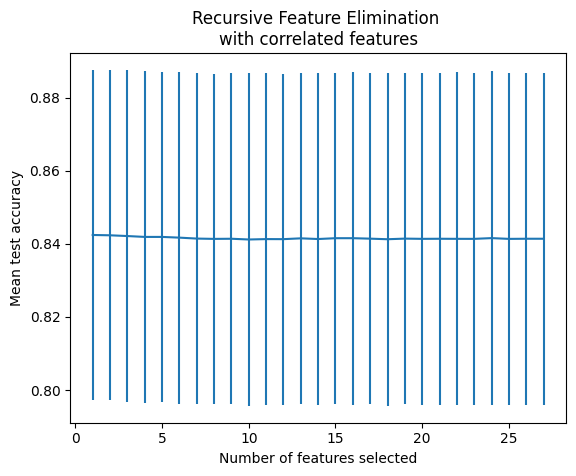

In [ ]:
import matplotlib.pyplot as plt

n_scores = len(selector.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    selector.cv_results_["mean_test_score"],
    yerr=selector.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
sorted(rfe_vars.items(), key=lambda x: x[1])

In [ ]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune and their respective values
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

